# Classification of Employee Data

**Data Source**
Human Resource Dataset - https://www.kaggle.com/datasets/rhuebner/human-resources-data-set

In this study we are going to build a classification tree to understand key attributes thart might lead to termination(termd - 0 , 1)

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

/Users/soumya/opt/anaconda3/lib/python3.8/site-packages/pandas/core/computation/expressions.py:20: UserWarning: Pandas requires version '2.7.3' or newer of 'numexpr' (version '2.7.1' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED


In [2]:
def basic_dataframe_info_and_null_check(df: pd.DataFrame):
    """
    This function checks 
    - shape of a data frame, 
    - data types of columns,
    - presence of null value in any olumn of the dataframe
    
    Args:
        df (pd.DataFrame): The input DataFrame.
    """
    rows, columns = df.shape
    print("Number of columns in train data :", columns)
    print("Number of rows in train data :", rows)

    # Check data types
    print("\n\ndata Type of All Attributes")
    print(df.info())

    # Check if there is any missing data
    print("\n\nMissing values in each column")
    print(df.isnull().sum())

In [3]:
# Read data
df = pd.read_csv("./HRDataset_v14.csv")
print(df.head())

              Employee_Name  EmpID  MarriedID  MaritalStatusID  GenderID  \
0       Adinolfi, Wilson  K  10026          0                0         1   
1  Ait Sidi, Karthikeyan     10084          1                1         1   
2         Akinkuolie, Sarah  10196          1                1         0   
3              Alagbe,Trina  10088          1                1         0   
4          Anderson, Carol   10069          0                2         0   

   EmpStatusID  DeptID  PerfScoreID  FromDiversityJobFairID  Salary  ...  \
0            1       5            4                       0   62506  ...   
1            5       3            3                       0  104437  ...   
2            5       5            3                       0   64955  ...   
3            1       5            3                       0   64991  ...   
4            5       5            3                       0   50825  ...   

      ManagerName  ManagerID RecruitmentSource PerformanceScore  \
0  Michael Albert  

# EDA and Data Enrichment

In [4]:
basic_dataframe_info_and_null_check(df)

Number of columns in train data : 36
Number of rows in train data : 311


data Type of All Attributes
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 311 entries, 0 to 310
Data columns (total 36 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Employee_Name               311 non-null    object 
 1   EmpID                       311 non-null    int64  
 2   MarriedID                   311 non-null    int64  
 3   MaritalStatusID             311 non-null    int64  
 4   GenderID                    311 non-null    int64  
 5   EmpStatusID                 311 non-null    int64  
 6   DeptID                      311 non-null    int64  
 7   PerfScoreID                 311 non-null    int64  
 8   FromDiversityJobFairID      311 non-null    int64  
 9   Salary                      311 non-null    int64  
 10  Termd                       311 non-null    int64  
 11  PositionID                  311 non-null    int

In [5]:
# Define columns to drop (IDs, redundancy, date fields, complex/granular features)
cols_to_drop = [
    'Employee_Name', 'EmpID',
    'MarriedID', 'MaritalStatusID', 'GenderID', 'EmpStatusID', 'DeptID', 'PerfScoreID', 'PositionID',
    'DateofTermination', 'TermReason', 'EmploymentStatus', # Target-related/leakage
    'DOB', 'DateofHire', 'LastPerformanceReview_Date',
    'Zip', 'ManagerID', 'ManagerName', 'State', 'Position', 'HispanicLatino','FromDiversityJobFairID','RecruitmentSource'
]
df_model = df.drop(columns=cols_to_drop)

In [6]:
basic_dataframe_info_and_null_check(df_model)

Number of columns in train data : 13
Number of rows in train data : 311


data Type of All Attributes
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 311 entries, 0 to 310
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Salary                311 non-null    int64  
 1   Termd                 311 non-null    int64  
 2   Sex                   311 non-null    object 
 3   MaritalDesc           311 non-null    object 
 4   CitizenDesc           311 non-null    object 
 5   RaceDesc              311 non-null    object 
 6   Department            311 non-null    object 
 7   PerformanceScore      311 non-null    object 
 8   EngagementSurvey      311 non-null    float64
 9   EmpSatisfaction       311 non-null    int64  
 10  SpecialProjectsCount  311 non-null    int64  
 11  DaysLateLast30        311 non-null    int64  
 12  Absences              311 non-null    int64  
dtypes: float64(1), int64(6)

In [7]:
# Identify categorical features and perform one-hot encoding
categorical_features = df_model.select_dtypes(include='object').columns.tolist()
print(categorical_features)

# Apply one hot encoding to categorical and drop the original categorical column
df_model_encoded = pd.get_dummies(df_model, columns=categorical_features, drop_first=True)
basic_dataframe_info_and_null_check(df_model_encoded)

['Sex', 'MaritalDesc', 'CitizenDesc', 'RaceDesc', 'Department', 'PerformanceScore']
Number of columns in train data : 27
Number of rows in train data : 311


data Type of All Attributes
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 311 entries, 0 to 310
Data columns (total 27 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Salary                              311 non-null    int64  
 1   Termd                               311 non-null    int64  
 2   EngagementSurvey                    311 non-null    float64
 3   EmpSatisfaction                     311 non-null    int64  
 4   SpecialProjectsCount                311 non-null    int64  
 5   DaysLateLast30                      311 non-null    int64  
 6   Absences                            311 non-null    int64  
 7   Sex_M                               311 non-null    bool   
 8   MaritalDesc_Married                 311 non-null    bo

# Create Test and Train Data

In [9]:
# Define X (Features) and Y (Target)
X = df_model_encoded.drop('Termd', axis=1)
Y = df_model_encoded['Termd']


# Convert boolean columns to float (for consistent type during model training)
X = X.astype(float)

# Split Data into training and testing sets (70% train, 30% test)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=48, stratify=Y)


# Build Decision Tree Model, Check Performance and Visualize

In [10]:
# Train the Classification Tree Model
# We set max_depth=3 for a visually interpretable tree.
dt_clf = DecisionTreeClassifier(max_depth=3, random_state=42)
dt_clf.fit(X_train, Y_train)

DecisionTreeClassifier(max_depth=3, random_state=42)

In [12]:
# Evaluate the Model
Y_pred = dt_clf.predict(X_test)
accuracy = accuracy_score(Y_test, Y_pred)

print(f"Decision Tree Classifier Test Accuracy (Max Depth 3): {accuracy:.4f}")

Decision Tree Classifier Test Accuracy (Max Depth 3): 0.6064


Text(0.5, 1.0, 'Classification Tree (Max Depth 3) for Employee Termination')

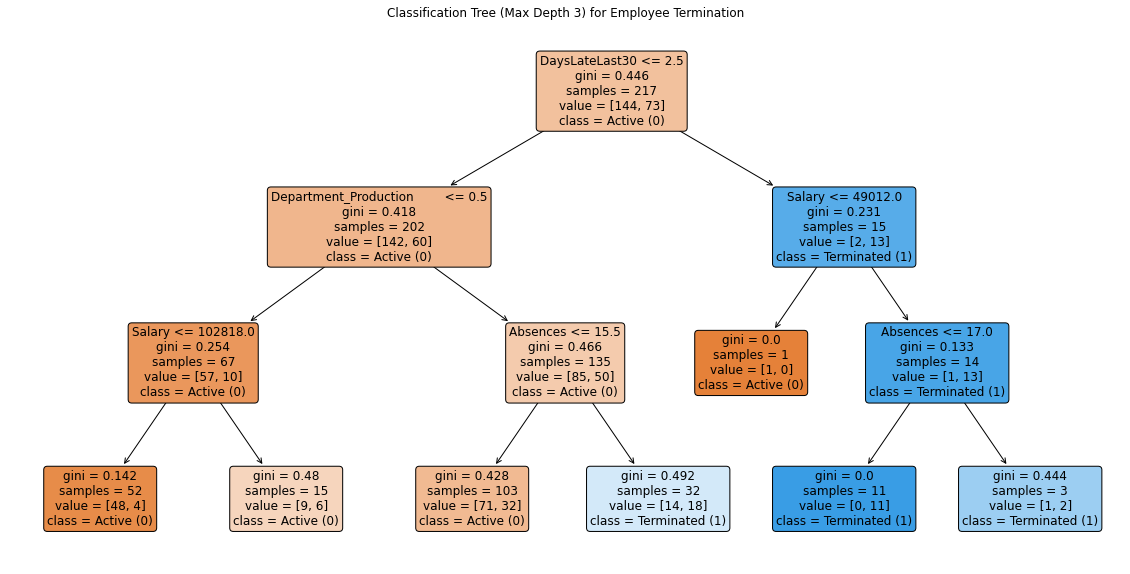

In [14]:
# Plot the Tree
feature_names = X.columns.tolist()
class_names = ['Active (0)', 'Terminated (1)']

plt.figure(figsize=(20, 10))
plot_tree(dt_clf,
          feature_names=feature_names,
          class_names=class_names,
          filled=True,
          rounded=True,
          fontsize=12)
plt.title("Classification Tree (Max Depth 3) for Employee Termination")

## Analysis

Low gini value denotes the pureness/correctness of the data. Studing the tree we can conclude that -

the primary drivers for predicting termination in this model are:

Key Factors for Termination:

High Lateness, Low Salary, and being in the Production department with high absences.